In [6]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
import os

In [3]:
image_path='images/sheet/digit/'
lis = []

In [4]:
for filename in os.listdir(image_path):
    lis.append(filename)

In [4]:
lis.sort(key=lambda f: int("".join(filter(str.isdigit, f))))
print(lis)

['1 154 76.jpg', '2 154 74.jpg', '3 153 76.jpg', '4 153 76.jpg', '5 155 77.jpg', '6 154 77.jpg', '7 154 76.jpg', '8 155 76.jpg', '9 154 76.jpg', '10 154 76.jpg', '11 206 75.jpg', '12 207 74.jpg', '13 206 73.jpg', '14 210 72.jpg', '15 206 72.jpg', '16 208 73.jpg', '17 206 72.jpg', '18 206 73.jpg', '19 206 72.jpg', '20 206 73.jpg', '21 210 72.jpg', '22 204 74.jpg']


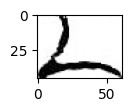

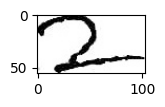

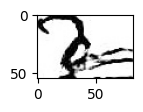

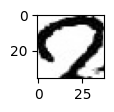

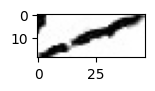

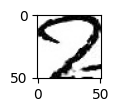

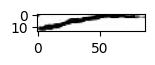

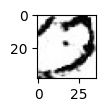

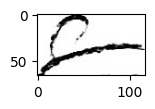

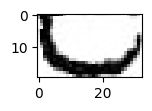

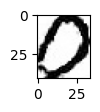

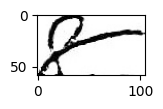

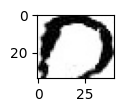

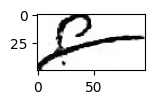

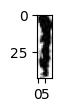

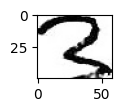

In [23]:
i=0
key=1
each_qn = {}
for filename in lis:
    if filename.endswith(".jpg"):
        each_qn[key]=[]
        img_path = os.path.join(image_path, filename)
        image = cv2.imread(img_path)
        input_copy = image.copy()
        org_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)


        img_gray = cv2.threshold(org_image, 150, 255, cv2.THRESH_BINARY_INV)[1]
        inverted_image = cv2.bitwise_not(img_gray)
        kernel = np.ones((3, 3), np.uint8)
        img_morphex = cv2.morphologyEx(inverted_image, cv2.MORPH_OPEN, kernel)
        img_morphex = cv2.bitwise_not(img_morphex)
        #plt.imshow(img_morphex, cmap='gray')
        #plt.show()

        contours, hierarchy = cv2.findContours(img_morphex, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
        img_contours = np.zeros(image.shape)
        image_copy = img_morphex.copy()

        #cv2.drawContours(input_copy, contours, -1, (0, 255, 0), 3)
        #cv2_imshow(input_copy)

        contours = sorted(contours, key=lambda x: cv2.boundingRect(x)[0])
        for _, c in enumerate(contours):
            boundRect = cv2.boundingRect(c)

            rectX = boundRect[0]
            rectY = boundRect[1]
            rectWidth = boundRect[2]
            rectHeight = boundRect[3]

            rectArea = rectWidth * rectHeight

            minArea = 400
            if rectArea > minArea:
                i += 1
                color = (0, 255, 0)
                cv2.rectangle(input_copy, (int(rectX), int(rectY)),
                              (int(rectX + rectWidth), int(rectY + rectHeight)), color, 1)
                #cv2_imshow(input_copy)

                #if i > 1:
                    #plt.imshow(input_copy)
                    #plt.show()


                currentCrop = image[rectY:rectY + rectHeight, rectX:rectX + rectWidth]

                cv2.imwrite("images/sheet/k/"+ str(i) +'.jpg', currentCrop)
                
                each_qn[key].append(i)
                plt.subplot(5, 4, 1)
                plt.imshow(currentCrop)
                plt.show()

        key+=1
        cv2.waitKey(0)
        cv2.destroyAllWindows()

In [24]:
each_qn

{1: [1],
 2: [2],
 3: [3],
 4: [4, 5],
 5: [6, 7],
 6: [],
 7: [],
 8: [],
 9: [],
 10: [],
 11: [8, 9],
 12: [10],
 13: [11, 12],
 14: [],
 15: [13, 14],
 16: [],
 17: [15, 16],
 18: [],
 19: [],
 20: [],
 21: [],
 22: []}